In [1]:
from pathlib import Path
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR


import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def replace_nan(df):
    # get a list of all the columns containing NaN
    nan_cols = df[df.columns[df.isnull().any()]].columns
    nan_cols = nan_cols.drop('bikes')
    # compute and fill each NaN with the columns mean
    df[nan_cols] = df[nan_cols].fillna(value=df[nan_cols].mean())

    
def show_nans(df):
    print(np.unique(df['station']))
    print(df.shape[0] - df.dropna().shape[0])
#     print(df[df.columns[df.isnull().any()]].columns)
    print(df.isnull().any())
    print()
    

# converting weekdays into integers [1-7]
def convert_weekdays(df):
    df = df.replace(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    [1, 2, 3, 4, 5, 6, 7])
    return df
    
def score_abs_error(model, data, num_docks, round_ = False):
    if round_ == True:
        y_pred = np.around(  model.predict(data.iloc[:,:-1].to_numpy()))# * num_docks  )
    else:
        y_pred = model.predict(data.iloc[:,:-1].to_numpy())# * num_docks
    y_gold = data["bikes"].to_numpy()# * num_docks
    
    return mean_absolute_error(y_gold, y_pred)

def reasonable_predictions(model, data):
    y_pred = model.predict(data.to_numpy())
    
    y_pred = np.around(y_pred)
    return y_pred


In [3]:
pd.options.mode.chained_assignment = None

def is_hol_weekend(row):
    if row['weekday'] == 6 or row['weekday'] == 7:
        return 1
    if row['isHoliday'] == 1:
        return 1
    return 0

def generate_dataframe(dataframe):
    dataframe = convert_weekdays(dataframe)
    
    # # deleting unneeded columns
    del dataframe["month"]
    del dataframe["year"]
    # del df["timestamp"]
    del dataframe["station"]
    del dataframe["precipitation.l.m2"]
    
    del dataframe["latitude"]
    del dataframe["longitude"]
    
    
    default_columns = list(dataframe.columns)
    
    dataframe['isOff'] = dataframe.apply(is_hol_weekend,axis=1)
    
    default_columns = ["isOff"] + default_columns
    
    dataframe = dataframe[default_columns]
    
    print(dataframe.columns)
    
    del dataframe['isHoliday']
    #del dataframe["timestamp"]
    
    
    columns = list(dataframe.columns[-6:])
    
    if "bikes" in columns:
        pass
    else:
        columns = columns[1:]
    
#     print(columns)
#     for c in columns:
#         dataframe[c] = dataframe[c].to_numpy() / dataframe["numDocks"].to_numpy()
    num_docks = dataframe["numDocks"]
    
    del dataframe["numDocks"]
    
    return dataframe, num_docks

def vectorise_dataframe(dataframe):
    
    # # deleting unneeded columns
    del dataframe["month"]
    del dataframe["year"]
    del dataframe["timestamp"]
    del dataframe["station"]
    del dataframe["precipitation.l.m2"]
    del dataframe["weekhour"]
    
    del dataframe["latitude"]
    del dataframe["longitude"]
    
    
    
    default_columns = list(dataframe.columns)
    #default_columns.remove('weekday')
    dataframe['isOff'] = dataframe.apply(is_hol_weekend,axis=1)
    
    #dataframe = pd.get_dummies(dataframe, columns=['weekday'])
    
    #default_columns = ["isOff", "weekday_Sunday", "weekday_Monday", "weekday_Tuesday", "weekday_Wednesday", 
                      #"weekday_Thursday", "weekday_Friday", "weekday_Saturday"] + default_columns
    
    default_columns = ["isOff"] + default_columns
    #del dataframe["weekday"]
    default_columns.remove('weekday')
    #print(default_columns)
    
    
    dataframe = dataframe[default_columns]
    
    #print(dataframe.columns)
    
    del dataframe['isHoliday']
    #del dataframe["timestamp"]
    
    
    columns = list(dataframe.columns[-6:])
    
    if "bikes" in columns:
        pass
    else:
        columns = columns[1:]
    
#     #print(columns)
#     for c in columns:
#         dataframe[c] = dataframe[c].to_numpy() / dataframe["numDocks"].to_numpy()
    num_docks = dataframe["numDocks"]
    
    dataframe["numDocks"]
    
    
    
    
#     columns_kept = ["weekday", "hour", "isOff",  'full_profile_3h_diff_bikes', 
#                      'short_profile_3h_diff_bikes',  "bikes"] #'bikes_3h_ago',
    
#     for c in dataframe.columns:
#         if c not in columns_kept:
#             del dataframe[c]
    
    
    return dataframe, num_docks

# Adding all files into one DataFrame
trains = []
vals = []

train_docks_list = []
val_docks_list = []

scalers = []

df = []

for i, path in enumerate(Path('./Train/Train').rglob('*.csv')):
    tmp = pd.read_csv(path)

    tmp = tmp.dropna(axis='rows')
    
    df.append(tmp)
    
df = pd.concat(df, ignore_index=True)
    
#     #print(tmp.columns)

    
#     if i  > 1:
#         train, val = train_test_split(tmp, test_size=0.02)

#         train, train_docks = vectorise_dataframe(train)
#         val, val_docks = vectorise_dataframe(val)

#         scaler = RobustScaler()
        
#         train[train.columns[:-1]] = scaler.fit_transform(train[train.columns[:-1]])
#         val[val.columns[:-1]] = scaler.transform(val[val.columns[:-1]])

#         trains.append(train)
#         vals.append(val)

#         train_docks_list.append(train_docks)
#         val_docks_list.append(val_docks)

#         scalers.append(scaler)
        
#         del tmp
#     elif i == 0:
#         val_set = tmp.copy()


#         val_set, val_set_docks = vectorise_dataframe(val_set)
#     else:
#         val_set_two = tmp.copy()


#         val_set_two, val_set_docks_two = vectorise_dataframe(val_set_two)
print(df.columns)

Index(['station', 'latitude', 'longitude', 'numDocks', 'timestamp', 'year',
       'month', 'day', 'hour', 'weekday', 'weekhour', 'isHoliday',
       'windMaxSpeed.m.s', 'windMeanSpeed.m.s', 'windDirection.grades',
       'temperature.C', 'relHumidity.HR', 'airPressure.mb',
       'precipitation.l.m2', 'bikes_3h_ago', 'full_profile_3h_diff_bikes',
       'full_profile_bikes', 'short_profile_3h_diff_bikes',
       'short_profile_bikes', 'bikes'],
      dtype='object')


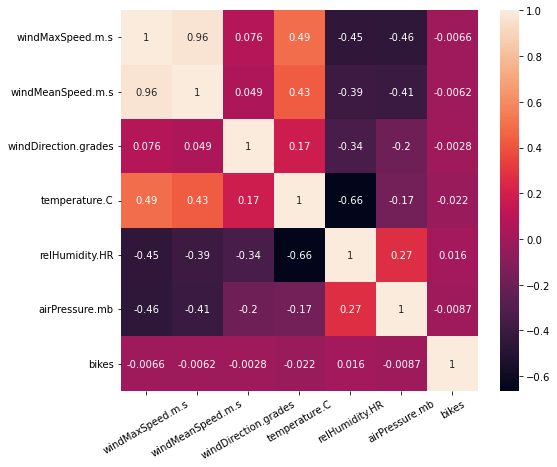

In [5]:
weathers = ['windMaxSpeed.m.s', 'windMeanSpeed.m.s', 'windDirection.grades',
       'temperature.C', 'relHumidity.HR', 'airPressure.mb', 'bikes']



corr = df.corr().loc[weathers, weathers]
#s = corr.unstack()
#so = s.sort_values(kind="quicksort")
fig, ax = plt.subplots(figsize = (8,7))

heatmap = sns.heatmap(corr, annot = True, ax=ax)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=30)

#plt.show()
plt.savefig("weather_correlations.png")

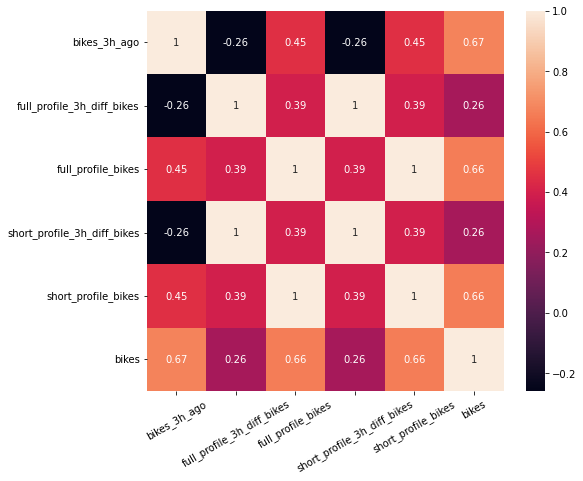

In [6]:
profile = ['bikes_3h_ago', 'full_profile_3h_diff_bikes',
       'full_profile_bikes', 'short_profile_3h_diff_bikes',
       'short_profile_bikes', 'bikes']

corr = df.corr().loc[profile, profile]
#s = corr.unstack()
#so = s.sort_values(kind="quicksort")
fig, ax = plt.subplots(figsize = (8,7))

heatmap = sns.heatmap(corr, annot = True, ax=ax)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=30)

#plt.show()
plt.savefig("profile_correlations.png")